# VERITAS AI

An immersive Virtual AI program for ambitious high school students, founded and run by Harvard graduate students. For more information, see [Veritas AI](https://www.veritasai.com/).

<p align="center">
    <a href="https://www.veritasai.com/">
        <img src="https://images.squarespace-cdn.com/content/v1/61e9374e0434354049a258f9/f89e8510-6098-4747-a89e-0cd34fe13376/Veritas_Fellowship+MP+White+copy+2.png" width="400" height="400"/>
    </a>
</p>

## Content: All Slides and Codes

The links of the colabs for the code walkthrough of the first 8 weeks are listed below. **PLEASE DO NOT EDIT THE SCRIPT DIRECTLY. REMEMBER TO SAVE AS A COPY IF YOU WANT TO RUN THE CODE**

Section | Name | Links
--- | --- | ---
1 | **Intro to Basic Python, Numpy, and Pandas** | [Code](https://colab.research.google.com/drive/1z-0Z852bFOUNYhve0wbsCcRJCZpCqcqp?usp=sharing)
2 | **Exploratory Data Analysis** | [Code](https://colab.research.google.com/drive/1VaSC8CsBxAn5JcnN2I5g2YP1m9aWBBMO?usp=sharing)
3 | **Basics in Linear Regression** | [Code](https://colab.research.google.com/drive/1HC4netVsOZT1BHjyUNcu8u8f1Etfoi2b?usp=sharing)
4 | **Basics in Logistic Regression** | [Code](https://colab.research.google.com/drive/1lm5nv5ULZqJBklZJMyRonJGyk0sNjWGi?usp=sharing)
5 | **Intro to Neural Networks** | [Code](https://colab.research.google.com/drive/1OGxD35fQxXdWNDwYGYpZcES5zgo6UvdO?usp=sharing)
6 | **Intro to Convolutional Neural Networks** | [Code](https://colab.research.google.com/drive/1YAjTioD_wUuRIKhacUDpH2TC6HEOfV5u?usp=sharing)
7 | **More in Deep Neural Networks** | [Code](https://colab.research.google.com/drive/1uM7CzWPLifgf16aVtJhWeOGN6A0guvlv?usp=sharing)
8 | **Advanced Convolutional Neural Networks** | [Code](https://colab.research.google.com/drive/1duxfMW5sQbx91c0BJWiP2oSHVdtcbtND?usp=sharing)

REMEMBER: **PLEASE DO NOT EDIT THE SCRIPT DIRECTLY. REMEMBER TO SAVE AS A COPY IF YOU WANT TO RUN THE CODE**


# NLP for investment decisions

![image](https://images.prismic.io/turing/652ebbf3fbd9a45bcec81810_Natural_Language_Processing_in_action_11zon_be0e4fa306.webp?auto=format%2Ccompress&fit=max&w=3840)

Using the natural language processing API we developed in Week 8, come up with a set of stocks/industries that you want to track. Connect sentiment analysis scores with average daily returns, and determine an optimal blend of stocks associated with each emotion for investment opportunities. Reproduce analyses provided in the presentation for up-to-date security returns, as well as historical backtesting.

Additional opportunities for NLP: Reddit, 10k documents and annual reports, newspaper articles, linked lists, Google search results, and any other language-based datastreams, several of which are available on public websites such as Kaggle.

- Algorithms: NLP, Linear Regression, Covariance Analysis.

- Difficulty: Moderate: degree of difficulty will depend on how extensive you want your NLP system to be.

Read more from [here](https://mitsloan.mit.edu/ideas-made-to-matter/why-finance-deploying-natural-language-processing).

# Reproduce previous analysis

In [ ]:
#@title Original sentiment analysis code

# Import relevant packages
import os
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pandas as pd
from urllib.request import urlopen, Request
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
nltk.download("vader_lexicon")

def extractor_finviz(tickers):

    # Initialise
    web_url = 'https://finviz.com/quote.ashx?t='
    news_tables = {}
    news_list = []

    # Extract raw headlines from web_url
    for tick in tickers:
        url = web_url + tick
        req = Request(url=url,headers={"User-Agent": "Chrome"})
        response = urlopen(req)
        html = BeautifulSoup(response,"html.parser")
        news_table = html.find(id='news-table')
        news_tables[tick] = news_table

    # Parse headlines and output in list-format
    for file_name, news_table in news_tables.items():
        for i in news_table.findAll('tr'):
            if i.a is not None:
              text = i.a.get_text()

            date_scrape = i.td.text.split()

            if len(date_scrape) == 1:
                time = date_scrape[0]

            else:
                date = date_scrape[0]
                time = date_scrape[1]

            tick = file_name.split('_')[0]

            news_list.append([tick, date, time, text])

    return news_list

def analyser_vader(news_list):

    # Initialise
    parse_date = lambda date_str: pd.to_datetime(date_str.lower()).date()
    vader = SentimentIntensityAnalyzer()


    # Format headlines into dataframe
    columns = ['ticker', 'date', 'time', 'headline']
    news_df = pd.DataFrame(news_list, columns=columns)

    # Compute vader sentiments and insert into dataframe
    scores = news_df['headline'].apply(vader.polarity_scores).tolist()
    scores_df = pd.DataFrame(scores)
    news_df = news_df.join(scores_df, rsuffix='_right')
    news_df['date'] = news_df['date'].apply(parse_date)

    return news_df

def visualise(news_df):

    # Compute mean sentiment scores
    mean_scores = news_df.drop( news_df.columns.difference(['ticker','date', 'compound']),axis=1).groupby(['ticker','date']).mean()
    mean_scores = mean_scores.unstack()
    mean_scores = mean_scores.xs('compound', axis="columns").transpose()

    # Plot the bar chart and get the Axes object
    ax = mean_scores.plot(kind='bar', figsize=(12, 6))  # Optional: Set figure size

    # Determine the number of bars and calculate step interval
    total_bars = len(mean_scores)
    max_ticks = 10
    step = max(1, total_bars // max_ticks)

    # Set tick positions
    ticks = np.arange(0, total_bars, step)
    ax.set_xticks(ticks)

    # Set tick labels
    tick_labels = mean_scores.index[ticks]
    ax.set_xticklabels(tick_labels, rotation=45, ha='right')  # Rotate labels for clarity

    # Customize the plot
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Customize grid lines
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, 0.05), fancybox=True, shadow=True, ncol=5)
    plt.tight_layout()  # Adjust layout to accommodate rotated labels and legend
    plt.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
#@title Basic NLP pipeline

# A simple NLP pipeline for extracting & visualising sentiments of given "tickers". It uses the
# "extractor" web-scraper-function, which takes the keyword arguments "kwargs_extractor", to provide
# data for some NLP "analyser" function, with keyword arguments "kwargs_analyser", that produces
# some sort of compound score that visualised at the end.
def pipeline_NLP(tickers, extractor, analyser, kwargs_extractor = {}, kwargs_analyser = {}):

    # Extract textual data and put it into a list format ala: news_list =
    # [ [ticker_1, date_1, time_1, text_1], [ticker_1, date_1, time_2, text_2], ...]
    news_list = extractor(tickers, **kwargs_extractor)

    # Perform NLP on news_list and return a dataframe that contains the following columns:
    # ticker, date, time, compound. The “compound” column contains a scalar which numerically
    # summarises the overall sentiment of a headline from a certain date, time pertaining to
    # some ticker.
    news_df = analyser(news_list, **kwargs_analyser)

    # Visualises news_df
    visualise(news_df)

    return news_df

# Try different industries

To start you off we provide the pipeline_NLP() function that by default uses code from the walkthrough.
Begin playing with it by feeding in tickers from different industries. Eg finance:

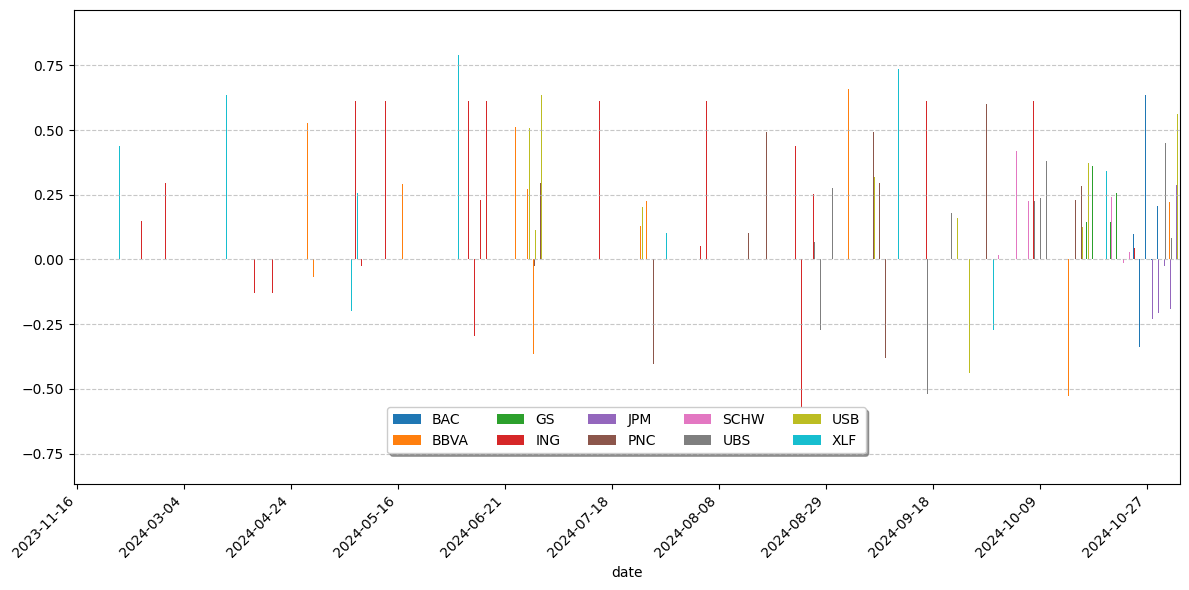

In [ ]:
# Select a few finance industry tickers
tickers_finance = ['BAC', 'JPM', 'USB', 'ING', 'GS', 'UBS', 'SCHW', 'XLF', 'BBVA', 'PNC']

# Get sentiment analysis
pipeline_NLP(tickers = tickers_finance, extractor = extractor_finviz, analyser= analyser_vader);

# Different web scrapers

A wide range of web scraper APIs are available. For example: tweepy for X/Twitter (although it is as of October 2024 pay-only), praw for Reddit and newsapi. Let's explore some codes for them!

## newsapi
For newsapi, we here provide full, working code:

In [ ]:
## newsapi: go to <https://newsapi.org>, create an API key and input it into the below code.

import requests

def extractor_newsapi(tickers):
    api_key = 'your_api'
    news_list = []

    for ticker in tickers:
        url = (f'https://newsapi.org/v2/everything?q={ticker}&'
               f'language=en&apiKey={api_key}')
        response = requests.get(url)
        articles = response.json().get('articles', [])

        for article in articles:
            news_list.append([
                ticker,
                pd.to_datetime(article['publishedAt']).date(),
                pd.to_datetime(article['publishedAt']).time(),
                article['title']
            ])
    return news_list

## wallstreetbets

You can also consider scraping X/Twitter (if you are already a paying user) or reddit/wallstreetbets. Let's focus on reddit for now since it's free:

In [ ]:
!pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 5.0 MB/s eta 0:00:00


In [ ]:
## Reddit: Create an app here <https://www.reddit.com/prefs/apps>, using <http://localhost:8080> for
# the redirect url. Once this is finished, check your email and insert
# client_id, client_secret and user_agent below to instantatiate the reddit object.

import praw
import datetime

def extractor_reddit(tickers):
    reddit = praw.Reddit(
        client_id='your_clind_id',
        client_secret='your_client_secret',
        user_agent='your_reddit_username'
    )

    posts_list = []
    subreddit = reddit.subreddit('wallstreetbets')

    for ticker in tickers:
        for submission in subreddit.search(f'${ticker}', limit=100):
            posts_list.append([
                ticker,
                datetime.datetime.fromtimestamp(submission.created_utc).date(),
                datetime.datetime.fromtimestamp(submission.created_utc).time(),
                submission.title
            ])
    return posts_list

# Alternative NLP analysers

Let's try a few different NLP analysers. For instance, finBERT.

## finBert

This is a BERT large language model (made by Google) fine-tuned for financial text sentiment analysis.

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

def analyser_finbert(news_list):

    # Initialize tokenizer and model
    tokenizer = AutoTokenizer.from_pretrained('ProsusAI/finbert')
    model = AutoModelForSequenceClassification.from_pretrained('ProsusAI/finbert')

    # Prepare DataFrame
    columns = ['ticker', 'date', 'time', 'headline']
    news_df = pd.DataFrame(news_list, columns=columns)

    sentiments = []
    for text in news_df['headline']:
        inputs = tokenizer(text, return_tensors='pt', truncation=True)
        outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
        positive = probs[0][0].item()
        negative = probs[0][1].item()
        neutral = probs[0][2].item()
        # Create a compound score similar to VADER
        compound = positive - negative
        sentiments.append({
            'pos': positive,
            'neg': negative,
            'neu': neutral,
            'compound': compound
        })
    sentiments_df = pd.DataFrame(sentiments)
    news_df = pd.concat([news_df, sentiments_df], axis=1)

    return news_df

## Is wallstreetbets happy with Elon?

Let's test our new function; how are the wallstreetbets currently feeling about Tesla?

In [ ]:
# Current sentiment analysis on Tesla from reddit/wallstreetbets:
# Note: make sure to set a valid client ids & secrets and user_agent in the extractor_reddit() function; otherwise you'll get a 401 HTTP (access denied) error!

news_TSLA_wsb_df = pipeline_NLP(tickers = ["TSLA"], extractor = extractor_reddit, analyser= analyser_finbert); display(news_TSLA_wsb_df)

Try now some other codes: the newsapi extractor (remember to generate a valid api_key!) with the finBert analyser, and compare against vader.

# Define Research Question

What question will you try to answer?

Write your project goal in the form of a question to help guide the steps that follow.

# Suggested to-do list:

1. Using the above tools, perform a systematic sentiment analysis on three sectors of your choice. What do you see?

In [ ]:
# Code goes here...

2. Choose a sector which has a decent amount of data, and try to connect the sentiment scores with real-time stock market data: starter code is provided below. What patterns do you see between the sentiment scores and the returns?
3. Try running, for example, a regularised linear model or random forests model.
    - Train it on the earliest ~3/4 headlines, and test it on the latest ~1/4. Why do we have to do the train-test split according to dates in this manner? Hint: a real-life model is supposed to predict the future based on the past.
    - Are the sentiments a strong predictor for stock returns? (Tip: they most likely will not, because real-life quant funds are actively incorporating sentiment analysis in their trades, which removes "the signal", ie predictive power of the sentiments)
    
# Challenge :
You can try to improve the accuracy of your model by:
- Adding more features, such as for example "sentiment momentum" (change in sentiment from one day to the next).
- Simplify the problem into a binary classification problem, where the goal is only to predict whether the stock is going up or down (ie, whether return is positive or negative).

Finally, for the truly motivated, you can also try to code-in your own web-scrapers and sentiment analysers (eg using the Loughran-McDonald lexicon, or a simple "bag of words" sentiment-analyser that is trained to predict the stock returns based on the scraped headlines).

In [ ]:
import yfinance as yf

# Starter code: this function produces a merged_news_df that contains both
# the sentiment scores and the stock-returns.
def connect_to_financial_data(news_df):

    # Get unique tickers and date range
    tickers = news_df['ticker'].unique()
    start_date = news_df['date'].min()
    end_date = news_df['date'].max() + pd.Timedelta(days=1)  # Include end date

    # Fetch stock prices
    stock_prices = yf.download(tickers=list(tickers), start=start_date, end=end_date)['Adj Close']

    # Compute daily returns
    stock_returns = stock_prices.pct_change().reset_index()

    # Melt stock_returns to long format
    stock_returns_melted = stock_returns.melt(id_vars='Date', var_name='ticker', value_name='return')
    stock_returns_melted.rename(columns={'Date': 'date'}, inplace=True)
    stock_returns_melted['date'] = pd.to_datetime(stock_returns_melted['date']).dt.date

    # Ensure 'date' in news_df is of type date
    news_df['date'] = pd.to_datetime(news_df['date']).dt.date

    # Compute daily mean sentiment scores (select only numeric columns)
    sentiment_scores = ['neg', 'neu', 'pos', 'compound']
    news_df_daily = news_df.groupby(['ticker', 'date'])[sentiment_scores].mean().reset_index()

    # Merge sentiment data with stock returns
    merged_news_df = pd.merge(news_df_daily, stock_returns_melted, on=['ticker', 'date'])

    # Drop rows with NaN returns
    merged_news_df = merged_news_df.dropna(subset=['return'])

    return merged_news_df

In [ ]:
merged_news_TSLA_wsb_df = connect_to_financial_data(news_TSLA_wsb_df); display(merged_news_TSLA_wsb_df)

# Code for machine learning model to predict "return" goes here...

## Performance Summary

Make a presentation of your result. You can refer to the syntax below.

Markdown | Preview
--- | ---
`**Model 1**` | **Model 2**
`*70%*` or `_italicized text_` | *90%*
`` `Monospace` `` | `Monospace`
`~~strikethrough~~` | ~~strikethrough~~
`[A link](https://www.google.com)` | [A link](https://www.google.com)
`![An image](https://www.google.com/images/rss.png)` | ![An image](https://www.google.com/images/rss.png)

More resources about creating tables in markdown of colab can be found [here](https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=Lhfnlq1Surtk).

## Interpretation and Future Work

Present and also interpret your experimental performance. Comment on potential future work or research questions that your project leads to. Consider all the assumptions that are baked into your model, and their validities.